##Importar librerías

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

##Cargar y explorar el dataset

In [6]:
df = pd.read_csv("../data/winequality-white.csv", sep=';')

print("Forma del dataset:", df.shape)
print("\nPrimeras filas:")
df.head(10)

Forma del dataset: (4898, 12)

Primeras filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


##Información general y calidad de dato

In [7]:
print("Información del dataset:")
df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticas descriptivas:")
df.describe()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid          

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##Distribución de la variable objetivo (quality)

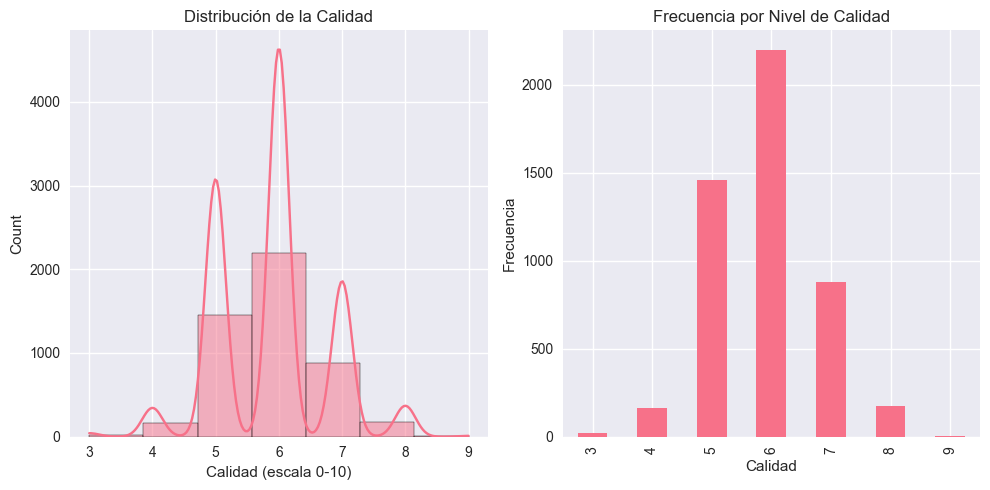

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['quality'], bins=7, kde=True)
plt.title('Distribución de la Calidad')
plt.xlabel('Calidad (escala 0-10)')

plt.subplot(1, 2, 2)
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Frecuencia por Nivel de Calidad')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

##Correlaciones

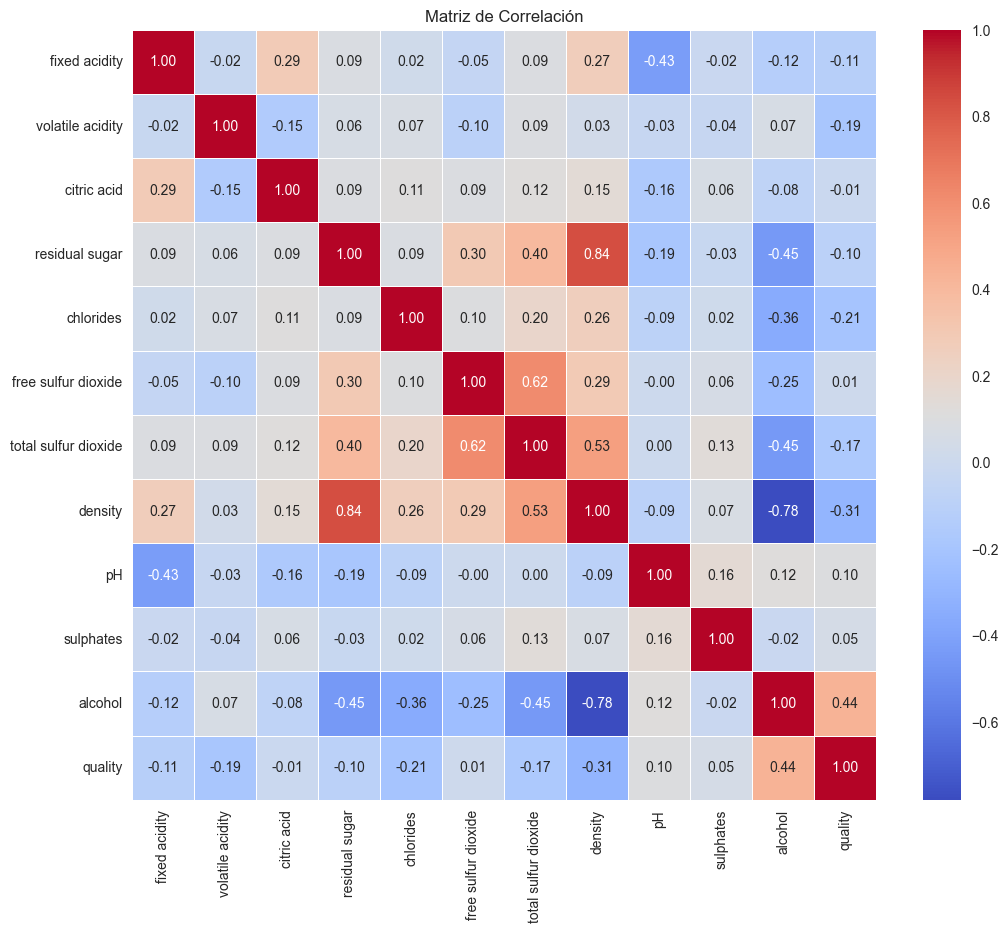

Top 5 variables más correlacionadas con 'quality':
alcohol                 0.435575
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
Name: quality, dtype: float64


In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

quality_corr = correlation_matrix['quality'].drop('quality').sort_values(key=abs, ascending=False)
print("Top 5 variables más correlacionadas con 'quality':")
print(quality_corr.head())

##Relación entre variables clave y calidad

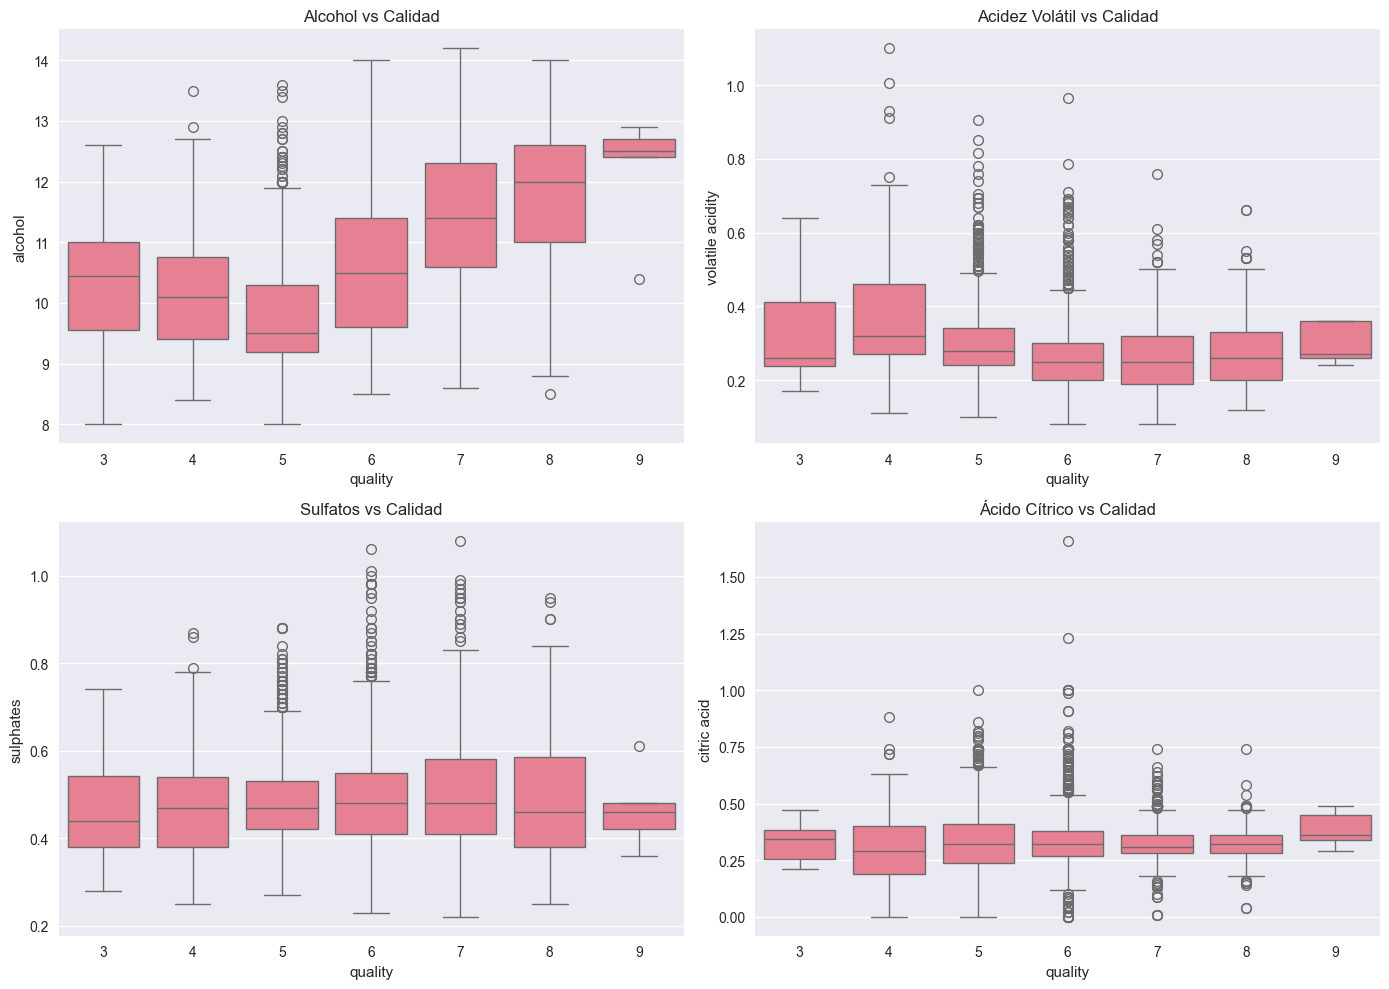

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=df, x='quality', y='alcohol', ax=axes[0,0])
axes[0,0].set_title('Alcohol vs Calidad')

sns.boxplot(data=df, x='quality', y='volatile acidity', ax=axes[0,1])
axes[0,1].set_title('Acidez Volátil vs Calidad')

sns.boxplot(data=df, x='quality', y='sulphates', ax=axes[1,0])
axes[1,0].set_title('Sulfatos vs Calidad')

sns.boxplot(data=df, x='quality', y='citric acid', ax=axes[1,1])
axes[1,1].set_title('Ácido Cítrico vs Calidad')

plt.tight_layout()
plt.show()

##Preparación para modelado

In [11]:
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)

Conjunto de entrenamiento: (3918, 11)
Conjunto de prueba: (980, 11)


##Modelo base (Random Forest) 

Modelo base (Random Forest):
- RMSE: 0.5897
- R²: 0.5510


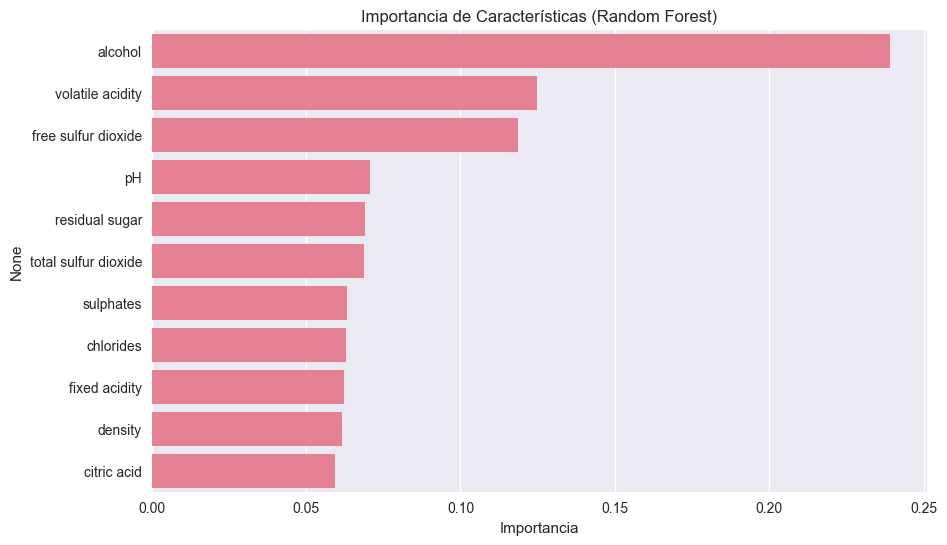

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Modelo base (Random Forest):\n- RMSE: {rmse:.4f}\n- R²: {r2:.4f}")

feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.values, y=feature_imp.index)
plt.title('Importancia de Características (Random Forest)')
plt.xlabel('Importancia')
plt.show()